<a href="https://colab.research.google.com/github/sanyamjain789523/personalProjects/blob/main/statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy import stats
# from pandas_profiling.utils.cache import cache_file

In [ ]:
df = pd.read_excel("/content/ALLDATA.xlsx")
df.head(2)

,Date,State,City,Narrative,UAS Proximity (ft),Airport Proximity (miles),Pilot's Action,Classification,Comments
0,10/1/2020,NEW YORK,WESTHAMPTON BEACH,"PRELIM INFO FROM FAA OPS: WESTHAMPTON BEACH, N...",NaN,NaN,0.0,Minimal,NaN
1,10/1/2020,COLORADO,COLORADO SPRINGS,"PRELIM INFO FROM FAA OPS: COLORADO SPRINGS, CO...",100.0,1.0,0.0,Catastrophic,NaN


# Hypothesis one 

In [ ]:
dfHOne = df[df["UAS Proximity (ft)"] <= 500]
# dfHOne.head(2)

In [ ]:
df.Classification.unique()
classDict = {'Minimal': 0, 'Catastrophic': 1, 'Hazardous':2, 'Minor':3}
dfHOne["ClassificationLabel"] = dfHOne["Classification"].apply(lambda x: classDict[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### KStest (Two sample test)

In [ ]:
from scipy.stats import ks_2samp
import numpy as np

np.random.seed(12345678)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
z = np.random.normal(1.1, 0.9, 1000)

ks_2samp(dfHOne["UAS Proximity (ft)"].to_list(),dfHOne["Pilot's Action"].to_list())


Ks_2sampResult(statistic=0.9989878542510121, pvalue=0.0)

The zero p value clearly states that the two distributions are totally different



## Skewness and kurtosis test

In [ ]:
import numpy as np
from scipy.stats import kurtosis, skew

print( 'kurtosis of UAS Proximity (ft) distribution -1.95 to 1.95: {}'.format( kurtosis(dfHOne["UAS Proximity (ft)"].to_list()) ))
print( 'skewness of UAS Proximity (ft) distribution -1 to 1: {}'.format( skew(dfHOne["UAS Proximity (ft)"].to_list()) ))
print()
print( 'kurtosis of Pilots Action distribution -1.95 to 1.95: {}'.format( kurtosis(dfHOne["Pilot's Action"].to_list()) ))
print( 'skewness of Pilots Action distribution -1 to 1: {}'.format( skew(dfHOne["Pilot's Action"].to_list()) ))

# Hence the data is not normally distributed

kurtosis of UAS Proximity (ft) distribution -1.95 to 1.95: -1.1795575299051217
skewness of UAS Proximity (ft) distribution -1 to 1: 0.44314116012061044

kurtosis of Pilots Action distribution -1.95 to 1.95: 460.5650308939254
skewness of Pilots Action distribution -1 to 1: 18.968274175574724


The above test clearly states that UAS proximity is relatively distributed while Pilot's action is not.

## Levene's test 

In [ ]:
from scipy.stats import levene
stat, p = levene(dfHOne["UAS Proximity (ft)"].to_list(),dfHOne["Pilot's Action"].to_list())
p



5.095252544169525e-254

The small p-value clearly state that the populations do not have equal variances.

## Hence as per the above tests, it's fairly clear that Pearson correlation will give weak correlation, let's verify that 

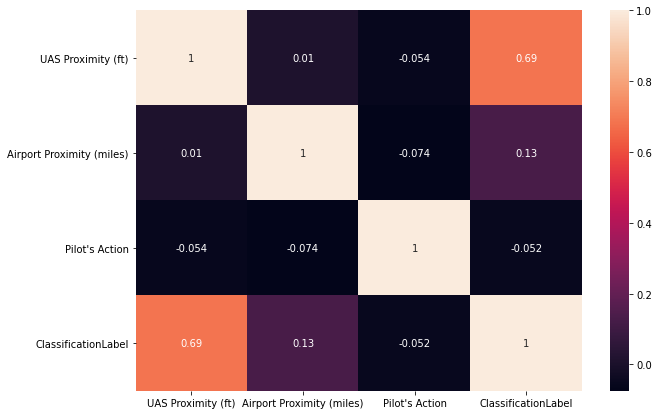

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(dfHOne.corr(), annot= True)

In [ ]:
from pydoc import help
from scipy.stats.stats import pearsonr
# help(pearsonr)
print("Value of Pearson correlation: ",pearsonr(dfHOne["UAS Proximity (ft)"].to_list(),dfHOne["Pilot's Action"].to_list()))
from scipy import stats
res = stats.ttest_ind(dfHOne["UAS Proximity (ft)"],dfHOne["Pilot's Action"])
print(res)
print(res[1])

Value of Pearson correlation:  (-0.05424141839843625, 0.0883740161946693)
Ttest_indResult(statistic=46.978420353474064, pvalue=0.0)
0.0


Hence there's a no correlation, and however the p-value obtained is 1.1272110065737868e-272

# Conclusion

UAS proximity less tha 500 has no relation with Pilot's action, hence the Null hypothesis is rejected and the alternate hypothesis that is Pilot's evasive Action is independent of UAS proximity is accepted

## Hypothesis two

In [ ]:
dfUAS_with_PA = df[df["Pilot's Action"]==1].groupby(["UAS Proximity (ft)"])["Pilot's Action"].sum().reset_index()
dfUAS_with_PA.columns = ["UAS Proximity (ft)", "Pilot's Action Count"]

Text(0.5, 1.0, "plot depicting relation between UAS Proximity and Pilot's Action Count with evasive pilot's action")

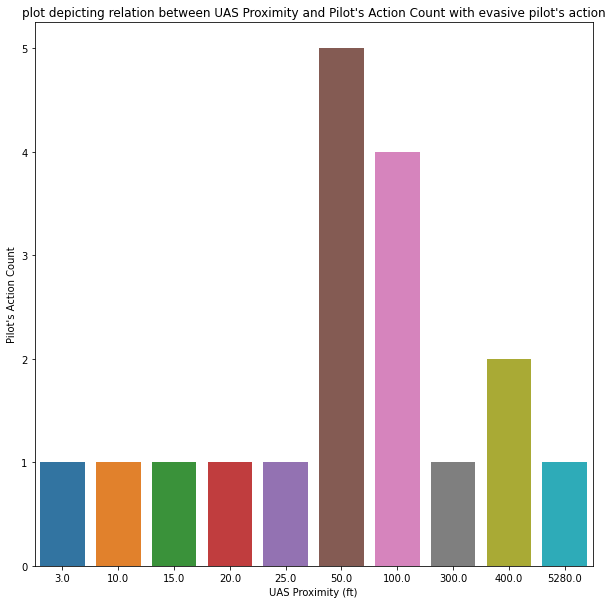

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = dfUAS_with_PA['UAS Proximity (ft)'], y = dfUAS_with_PA["Pilot's Action Count"])
plt.title("plot depicting relation between UAS Proximity and Pilot's Action Count with evasive pilot's action")

In [ ]:
dfUAS_without_PA = df[df["Pilot's Action"]==0].groupby(["UAS Proximity (ft)"])["Pilot's Action"].count().reset_index()
dfUAS_without_PA.columns = ["UAS Proximity (ft)", "Pilot's Action Count"]

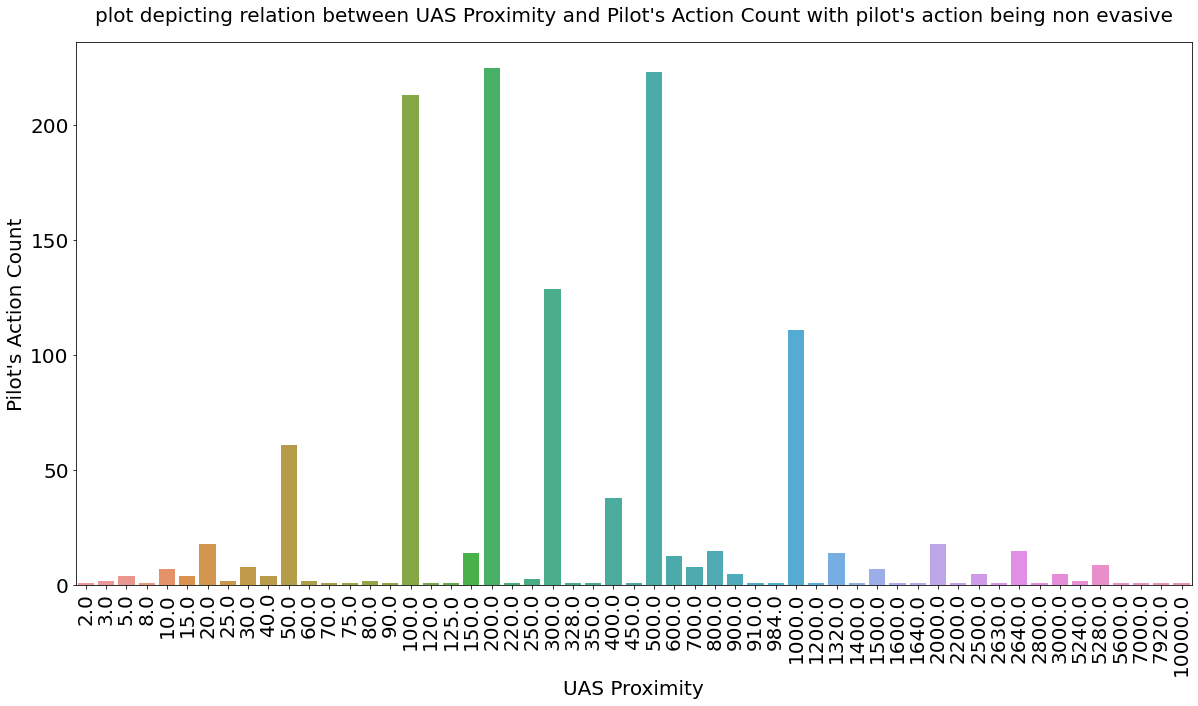

In [ ]:
plt.figure(figsize=(20,10))
p = sns.barplot(x = dfUAS_without_PA['UAS Proximity (ft)'], y = dfUAS_without_PA["Pilot's Action Count"])
p.axes.set_title("plot depicting relation between UAS Proximity and Pilot's Action Count with pilot's action being non evasive",fontsize=20, pad=20)
plt.xticks(rotation=90)
p.tick_params(labelsize=20)
p.set_xlabel("UAS Proximity",fontsize=20)
p.set_ylabel("Pilot's Action Count",fontsize=20)
plt.show()

In [ ]:
percentage = (dfUAS_with_PA["Pilot's Action Count"].sum()/(dfUAS_with_PA["Pilot's Action Count"].sum()+dfUAS_without_PA["Pilot's Action Count"].sum()))
print("percentage of UAS sightings result in pilot's evasive action: ", percentage*100, "%")

percentage of UAS sightings result in pilot's evasive action:  1.4657980456026058 %


The above two graphs and the percentage calculated clearly show that 

First, less than half of UAS sightings have resulted in Pilot's evasive actions.

Second, Pilot's evasive actions are totally independent of the proximity level

## Conclusion: Hence the null hypothesis is accepted